# K-Means

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('KMeansData.csv')
X=dataset.iloc[:,:].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화(전체 데이터 분포확인)

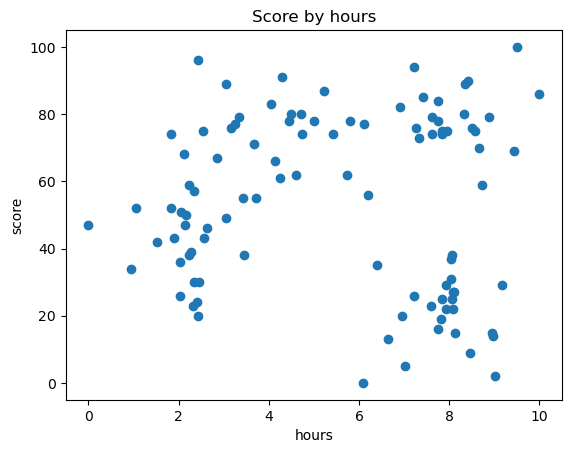

In [4]:
plt.scatter(X[:,0],X[:,1]) # X축은 공부시간 Y축은 점수
plt.title("Score by hours")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (축범위 통일)

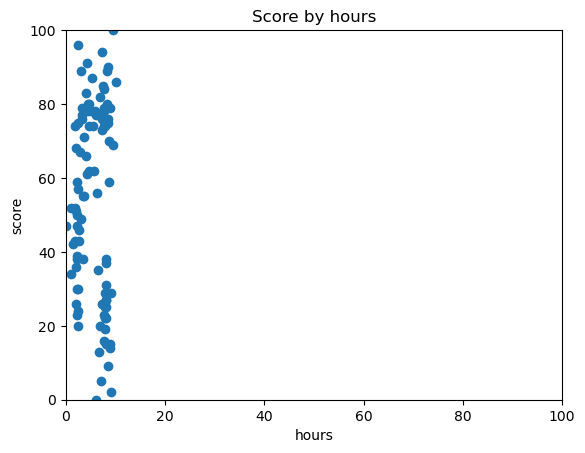

In [5]:
plt.scatter(X[:,0],X[:,1]) # X축은 공부시간 Y축은 점수
plt.title("Score by hours")
plt.xlabel('hours')
plt.xlim(0,100)
plt.ylabel('score')
plt.ylim(0,100)
plt.show()

### 피쳐 스케일링 (Feature Scaling)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링된 데이터)

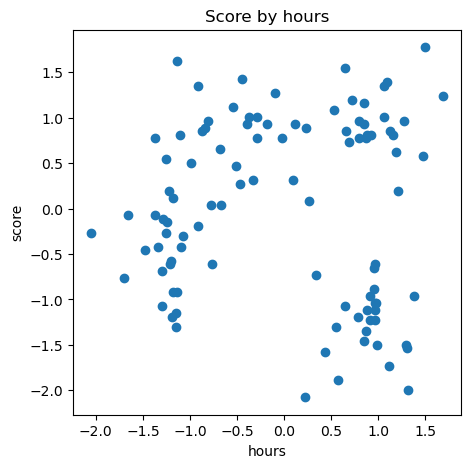

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1]) # X축은 공부시간 Y축은 점수
plt.title("Score by hours")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 최적의 K값 찾기 (엘보우 방식 Elbow Method)

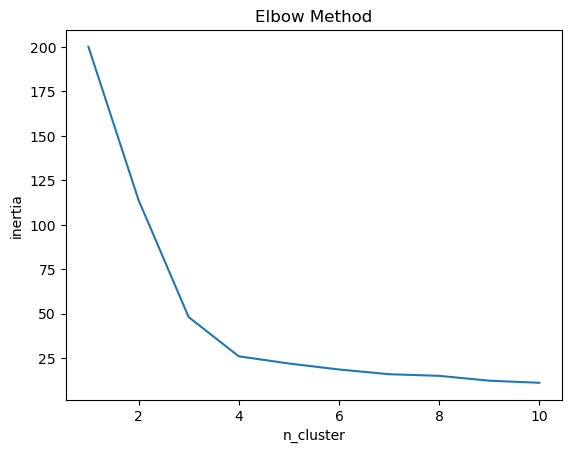

In [9]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,n_init=10,init='k-means++',random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로 부터 클러스터의 중심까지의 거리의 제곱의 합

plt.plot(range(1,11),inertia_list)
plt.title("Elbow Method")
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()